# Problem Statement

Build a model to detect fraudulent credit card transactions. 

# Libraries

In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')

#data gathering
import os
os.chdir('C:/Users/ASUS/Downloads/CodSoft/Credit Card Fraud/')
import pandas as pd
import numpy as np

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

#preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

#split
from sklearn.model_selection import train_test_split

from joblib import Parallel, delayed

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score

#cross validation
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Data Gathering

In [2]:
df = pd.read_csv('fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
df = df.rename(columns={'Unnamed: 0': 'id'}) #renaming the Column

In [4]:
df = df.set_index('id')                     #setting index column as id
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0


# Exploratory Data Analysis

In [5]:
df.duplicated().sum()       #to get duplicate columns

0

In [6]:
df.isna().sum()            #to get null columns

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

* The Data does not have any missing values and hence, need not be handled.

In [7]:
df.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob' , 'trans_num','trans_date_trans_time'],inplace=True)
df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
id,,,,,,,,,,,,
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0


Dropping Columns which are not important

In [8]:
df.info()          #to get informtion about the columns

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 128.6+ MB


In [9]:
df = df.sample(n=250000, random_state=42)        #random sampling
df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
id,,,,,,,,,,,,
1045211,fraud_Towne LLC,misc_pos,194.51,M,40.6153,-79.4545,972,Public relations account executive,1362841766,40.420453,-78.865012,0
547406,fraud_Friesen Ltd,health_fitness,52.32,F,42.8250,-124.4409,217,Retail merchandiser,1345650541,42.758860,-123.636337,0
110142,fraud_Mohr Inc,shopping_pos,6.53,F,39.9636,-79.7853,184,Systems developer,1330824856,40.475159,-78.898190,0
1285953,fraud_Gaylord-Powlowski,home,7.33,M,42.9580,-77.3083,10717,Cytogeneticist,1371413078,43.767506,-76.542384,0
271705,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,F,41.6423,-104.1974,635,Product/process development scientist,1336974888,41.040392,-104.092324,0
...,...,...,...,...,...,...,...,...,...,...,...,...
423239,fraud_McKenzie-Huels,food_dining,16.79,F,41.4193,-99.3844,73,Product designer,1341785493,40.922893,-99.768511,0
121141,"fraud_Konopelski, Schneider and Hartmann",food_dining,4.48,F,44.3346,-73.0980,4542,Claims inspector/assessor,1331295422,44.818831,-72.887827,0
992515,fraud_Jast-McDermott,shopping_pos,6.22,M,32.9643,-96.6012,20328,Site engineer,1360430380,32.344384,-96.242321,0


* Random Sampling - The purpose of using the sample method is to randomly select a subset of the rows from the DataFrame.
* By using random_state, ensuring that your random sampling is reproducible.
* I have a large DataFrame with 1,200,000 rows, and  want to work with a smaller subset of 250,000 rows

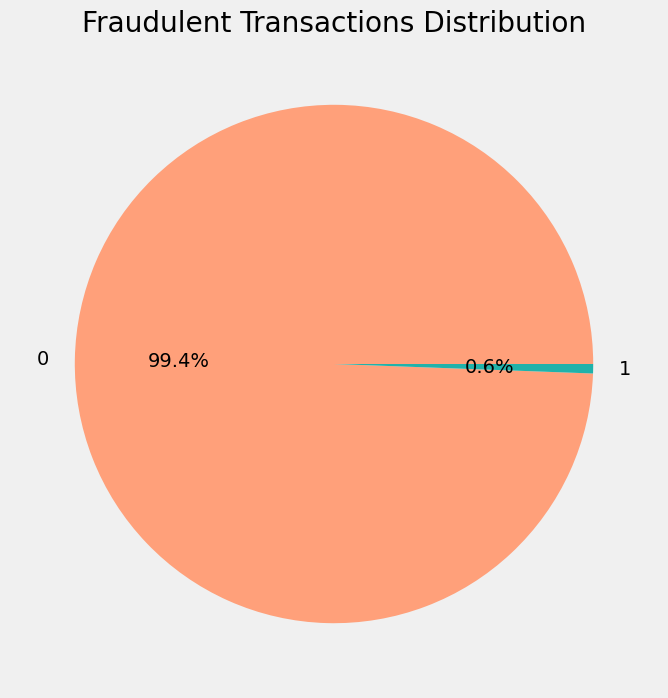

In [10]:
# Count the occurrences of each class in 'is_fraud'
fraud_counts = df['is_fraud'].value_counts()

# Define custom colors
custom_colors = ['#FFA07A', '#20B2AA']  # Light Salmon, Light Sea Green

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, colors=custom_colors, autopct='%1.1f%%')

# Adding a title
plt.title('Fraudulent Transactions Distribution')

# Display the pie chart
plt.show()


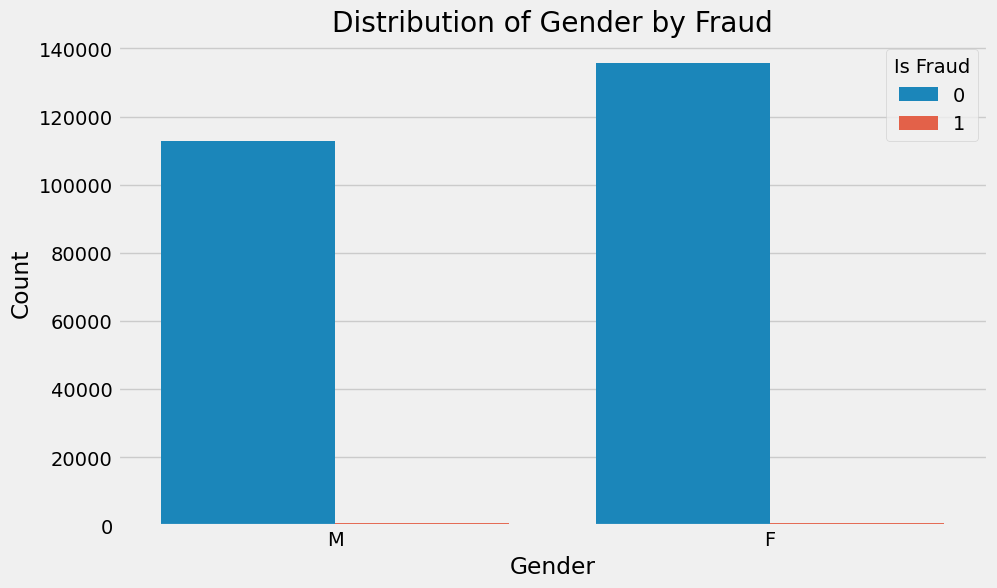

In [11]:
# Explore categorical features (e.g., gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=df)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

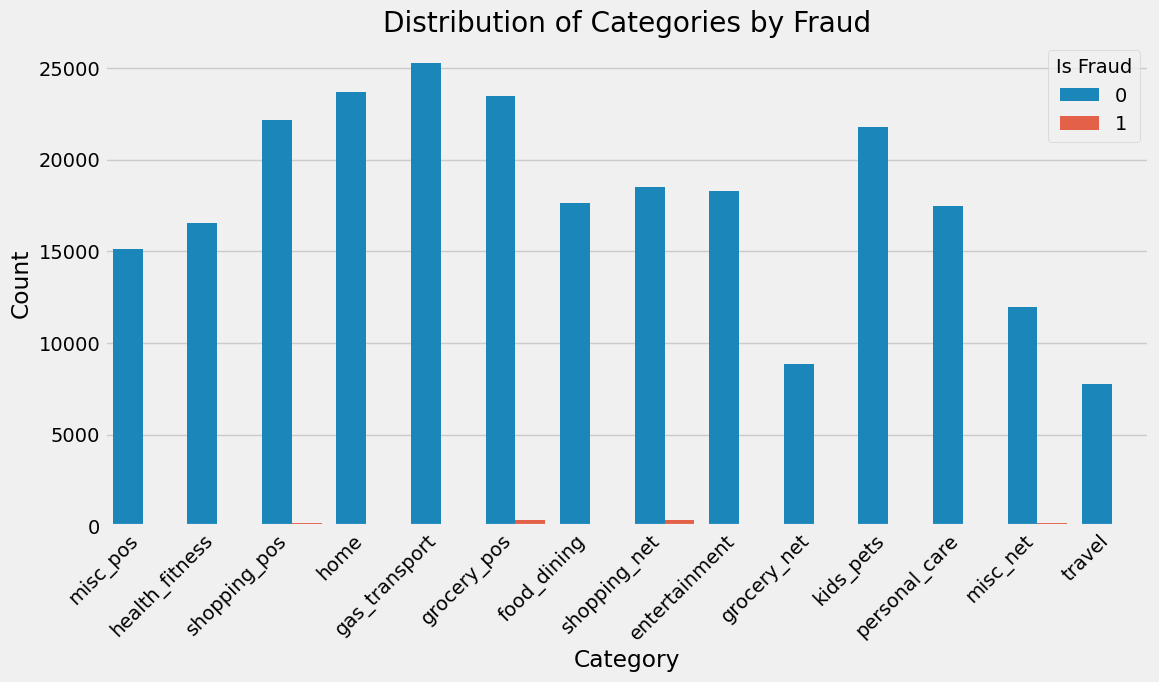

In [12]:
# Explore categorical features (e.g., category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

# Preprocessing

In [13]:
x = df.drop(columns=["is_fraud"], inplace = False)           #feature_selection
y = df["is_fraud"]

In [14]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [15]:
cat                                                      #catagorical_columns

['merchant', 'category', 'gender', 'job']

In [16]:
con                                                     #numerical_columns

['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

In [17]:
#pipelines 
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [18]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['amt', 'lat', 'long', 'city_pop', 'unix_time',
                                  'merch_lat', 'merch_long']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OrdinalEncoder())]),
                                 ['merchant', 'category', 'gender', 'job'])])

In [19]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,num_pipe__amt,num_pipe__lat,num_pipe__long,num_pipe__city_pop,num_pipe__unix_time,num_pipe__merch_lat,num_pipe__merch_long,cat_pipe__merchant,cat_pipe__category,cat_pipe__gender,cat_pipe__job
0,0.738733,0.409441,0.782144,-0.288833,1.056138,0.368350,0.824164,629.0,9.0,1.0,374.0
1,-0.107814,0.844756,-2.480988,-0.291328,-0.283122,0.825997,-2.420647,180.0,5.0,0.0,396.0
2,-0.380431,0.281055,0.758149,-0.291437,-1.438097,0.379057,0.821759,429.0,12.0,0.0,440.0
3,-0.375668,0.870958,0.937821,-0.256629,1.723875,1.023397,0.992497,187.0,6.0,1.0,111.0
4,-0.036549,0.611762,-1.012606,-0.289946,-0.958987,0.489678,-1.004191,92.0,2.0,0.0,354.0
...,...,...,...,...,...,...,...,...,...,...,...
249995,-0.319347,0.567831,-0.663491,-0.291804,-0.584223,0.466682,-0.690821,418.0,1.0,0.0,352.0
249996,-0.392636,1.142151,1.243219,-0.277035,-1.401438,1.229151,1.257362,331.0,1.0,0.0,83.0
249997,-0.382277,-1.097822,-0.461609,-0.224868,0.868282,-1.212205,-0.435260,284.0,12.0,1.0,418.0
249998,-0.131867,0.404280,1.071563,0.256794,0.248951,0.516376,1.062684,654.0,5.0,0.0,409.0


# Splitting Data into train and test set

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,stratify=y,random_state=23)

# Model Evaluation

In [21]:
la=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
knc=KNeighborsClassifier()
svc=SVC()

In [22]:
model_list=[la,dtc,rfc,abc,knc,svc]     # model_list contains the following machine learning models: la, dtc, rfc, abc, svc

In [23]:
from sklearn.metrics import f1_score

# Initialize variables to keep track of the best model and its performance
best_model = None
best_f1_score = 0.0

# Assuming model_list contains valid model objects
for i, model in enumerate(model_list):
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on training and test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Calculate F1 scores
    tr_f1 = round(f1_score(y_train, y_pred_train, average='weighted'), 2)
    ts_f1 = round(f1_score(y_test, y_pred_test, average='weighted'), 2)

    print('*' * 50)
    print(f"Model {i + 1}: {model}")
    print('Training F1:', tr_f1)
    print('Testing F1:', ts_f1)
    
    # Update the best model if necessary
    if ts_f1 > best_f1_score:
        best_f1_score = ts_f1
        best_model = model

print('*' * 50)
print("Best Model:")
print(best_model)
print("Best Testing F1 Score:", best_f1_score)

**************************************************
Model 1: LogisticRegression()
Training F1: 0.99
Testing F1: 0.99
**************************************************
Model 2: DecisionTreeClassifier()
Training F1: 1.0
Testing F1: 1.0
**************************************************
Model 3: RandomForestClassifier()
Training F1: 1.0
Testing F1: 1.0
**************************************************
Model 4: AdaBoostClassifier()
Training F1: 0.99
Testing F1: 0.99
**************************************************
Model 5: KNeighborsClassifier()
Training F1: 0.99
Testing F1: 0.99
**************************************************
Model 6: SVC()
Training F1: 0.99
Testing F1: 0.99
**************************************************
Best Model:
DecisionTreeClassifier()
Best Testing F1 Score: 1.0


* DecisionTreeClassifier is the best estimator.

# Tuning DecisionTreeClassifier using RandomizedSearchCV

In [24]:
grid={
    'criterion':['gini','entropy'],
    'max_depth':range(1,500),
    'min_samples_split':range(1,30),
    'min_samples_leaf':range(1,30)
}

In [25]:
rs=RandomizedSearchCV(dtc,param_distributions=grid,cv=3)

In [26]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 500),
                                        'min_samples_leaf': range(1, 30),
                                        'min_samples_split': range(1, 30)})

In [27]:
rs.best_params_

{'min_samples_split': 19,
 'min_samples_leaf': 24,
 'max_depth': 489,
 'criterion': 'entropy'}

In [28]:
dtc1=rs.best_estimator_
dtc1

DecisionTreeClassifier(criterion='entropy', max_depth=489, min_samples_leaf=24,
                       min_samples_split=19)

### Training Data Evaluation for DecisionTreeClassifier

In [29]:
y_pred_train1=dtc1.predict(x_train)

acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=confusion_matrix(y_pred_train1,y_train)

print('*'*50)
print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

**************************************************
Accuracy: 0.99743
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    198992
           1       0.71      0.82      0.76      1008

    accuracy                           1.00    200000
   macro avg       0.86      0.91      0.88    200000
weighted avg       1.00      1.00      1.00    200000

Confusion Matrix:
 [[198656    336]
 [   178    830]]


### Testing Data Evaluation for DecisionTreeClassifier

In [30]:
y_pred1=dtc1.predict(x_test)

acc1=accuracy_score(y_pred1,y_test)
clf1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)

print('*'*50)
print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

**************************************************
Accuracy: 0.99658
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     49769
           1       0.60      0.76      0.67       231

    accuracy                           1.00     50000
   macro avg       0.80      0.88      0.84     50000
weighted avg       1.00      1.00      1.00     50000

Confusion Matrix:
 [[49653   116]
 [   55   176]]


# Prediction with Testing Dataset

In [31]:
df1=pd.read_csv('fraudTest.csv')
df1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [32]:
df1 = df1.rename(columns={'Unnamed: 0': 'id'}) #renaming the Column
df1

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [33]:
x2=pd.DataFrame(pre.fit_transform(df1),columns=pre.get_feature_names_out())
x2

,num_pipe__amt,num_pipe__lat,num_pipe__long,num_pipe__city_pop,num_pipe__unix_time,num_pipe__merch_lat,num_pipe__merch_long,cat_pipe__merchant,cat_pipe__category,cat_pipe__gender,cat_pipe__job
0,-0.424463,-0.904377,0.677451,0.816521,-1.703871,-0.894145,0.657586,319.0,10.0,1.0,275.0
1,-0.252337,0.351182,-1.472454,-0.292685,-1.703869,0.178126,-1.436610,591.0,10.0,0.0,392.0
2,-0.179353,0.420768,1.216667,-0.178853,-1.703865,0.383257,1.167640,611.0,5.0,0.0,259.0
3,-0.059605,-1.970539,0.685934,-0.111371,-1.703861,-1.909485,0.680717,222.0,9.0,1.0,407.0
4,-0.422358,1.128092,0.380004,-0.289942,-1.703861,1.259139,0.316510,292.0,13.0,1.0,196.0
...,...,...,...,...,...,...,...,...,...,...,...
555714,-0.163467,0.385244,-0.120967,-0.291963,1.510350,0.275527,-0.080241,507.0,5.0,1.0,460.0
555715,0.270803,-1.877757,-0.379599,-0.198018,1.510351,-1.742946,-0.433644,264.0,7.0,1.0,198.0
555716,0.111564,1.512121,-2.089408,-0.281427,1.510352,1.592587,-2.146912,496.0,7.0,0.0,294.0
555717,-0.391735,1.201709,-1.910685,-0.293261,1.510354,1.163252,-1.955100,75.0,13.0,1.0,58.0


In [34]:
pred = dtc1.predict(x2)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
Submission=df1[['id']]
Submission

,id
0,0
1,1
2,2
3,3
4,4
...,...
555714,555714
555715,555715
555716,555716
555717,555717


In [36]:
Submission['is_fraud']=pred
Submission

,id,is_fraud
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
555714,555714,0
555715,555715,0
555716,555716,0
555717,555717,0


In [37]:
Submission['is_fraud'].value_counts()

is_fraud
0    553652
1      2067
Name: count, dtype: int64

In [38]:
Submission.to_csv('Submission.csv',index=False)